# Recursos
Bathia (2010) <br>
Horta (2018) <br>
Kokoszka (2019)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# data
lqdensities_path = "../data/processed/lqdensities.xlsx"

lqdensities = pd.read_excel(lqdensities_path, index_col="x")
lqdensities.head()

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_112,t_113,t_114,t_115,t_116,t_117,t_118,t_119,t_120,t_121
x,,,,,,,,,,,,,,,,,,,,,
0.000000,-3.510057,-4.112028,-3.245852,-3.451768,-3.010697,-2.416859,-2.941917,-3.757795,-4.049503,-2.462951,...,-4.106067,-3.044384,-3.499390,-3.806129,-3.256140,-3.627464,-3.130958,-2.843934,-2.740841,-2.971827
0.005025,-3.831881,-4.280989,-3.595798,-3.755390,-3.047621,-1.405972,-2.863023,-4.039823,-4.279095,-2.480686,...,-4.258328,-3.449396,-3.708159,-3.974514,-3.448629,-3.867496,-3.486383,-2.981364,-2.808421,-3.219460
0.010050,-4.056523,-4.415420,-3.900718,-3.986254,-3.194371,-2.904361,-3.497128,-4.238690,-4.443333,-2.980616,...,-4.371172,-3.737058,-3.837260,-4.091067,-3.596603,-4.040252,-3.728953,-2.983511,-2.846394,-3.431278
0.015075,-4.234897,-4.528753,-4.172718,-4.185588,-3.444439,-3.536240,-4.004996,-4.391251,-4.567315,-3.386732,...,-4.458680,-3.952467,-3.922403,-4.180115,-3.821583,-4.184463,-3.907602,-3.041303,-2.974170,-3.652233
0.020101,-4.385658,-4.626079,-4.403389,-4.360551,-3.745242,-3.871029,-4.325151,-4.514555,-4.664294,-3.631419,...,-4.528478,-4.119930,-3.981792,-4.254348,-4.085199,-4.312487,-4.044709,-3.367491,-3.397260,-3.870436


In [4]:
# Defining the inner product on L^2([a,b])
# inner.product = function(f, g, du) {drop(crossprod(f, g))*du}
def inner_product(f, g, du):
    """
    f, g = vectors
    """
    ip = (f.T @ g)*du
    return ip

#The du in this context represents the differential element or step size in numerical integration, 
# specifically for approximating the inner product in the function space L²([a,b]).
# du is the spacing between sample points

In [5]:
# Defining the L2-norm
# L2norm = function(f, du) {sqrt(inner.product(f, f, du))}
def L2norm(f,du):
    norm = np.sqrt(inner_product(f, f, du))
    return norm

In [6]:
# Nxp: row=number_of_daily_observations and p=number_of_curves

#3 curves with dimension 2
matrixX = np.array([[1, 2],
                    [3, 4],
                    [5, 6]])

# 4 curves with dimension 5
# Y = np.array([  [2, 1, 3, 4],
#                 [1, 0, 2, 1],
#                 [3, 2, 1, 0],
#                 [1, 2, 3, 4],
#                 [4, 3, 2, 1]])

Y = lqdensities.reset_index(drop=True)
Y

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_112,t_113,t_114,t_115,t_116,t_117,t_118,t_119,t_120,t_121
0,-3.510057,-4.112028,-3.245852,-3.451768,-3.010697,-2.416859,-2.941917,-3.757795,-4.049503,-2.462951,...,-4.106067,-3.044384,-3.499390,-3.806129,-3.256140,-3.627464,-3.130958,-2.843934,-2.740841,-2.971827
1,-3.831881,-4.280989,-3.595798,-3.755390,-3.047621,-1.405972,-2.863023,-4.039823,-4.279095,-2.480686,...,-4.258328,-3.449396,-3.708159,-3.974514,-3.448629,-3.867496,-3.486383,-2.981364,-2.808421,-3.219460
2,-4.056523,-4.415420,-3.900718,-3.986254,-3.194371,-2.904361,-3.497128,-4.238690,-4.443333,-2.980616,...,-4.371172,-3.737058,-3.837260,-4.091067,-3.596603,-4.040252,-3.728953,-2.983511,-2.846394,-3.431278
3,-4.234897,-4.528753,-4.172718,-4.185588,-3.444439,-3.536240,-4.004996,-4.391251,-4.567315,-3.386732,...,-4.458680,-3.952467,-3.922403,-4.180115,-3.821583,-4.184463,-3.907602,-3.041303,-2.974170,-3.652233
4,-4.385658,-4.626079,-4.403389,-4.360551,-3.745242,-3.871029,-4.325151,-4.514555,-4.664294,-3.631419,...,-4.528478,-4.119930,-3.981792,-4.254348,-4.085199,-4.312487,-4.044709,-3.367491,-3.397260,-3.870436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-4.048338,-3.478325,-4.436984,-4.317808,-4.677102,-4.045852,-4.115674,-3.268130,-5.356169,-3.132514,...,-4.273772,-3.854745,-4.184264,-3.545500,-4.099065,-3.318082,-3.785533,-3.906932,-2.535356,-3.377913
196,-3.915486,-3.160963,-4.308809,-4.002791,-4.529087,-3.722712,-3.843236,-3.111856,-5.299856,-2.610218,...,-4.189497,-3.679557,-4.034611,-3.453290,-4.010494,-3.358103,-3.484610,-3.539552,-2.353556,-3.033560
197,-3.875483,-2.634779,-4.141682,-3.438566,-4.352481,-3.194206,-3.408403,-3.138002,-5.237082,-2.432345,...,-4.112210,-3.442267,-3.832875,-3.326320,-3.904869,-3.489829,-2.898233,-2.886054,-2.553237,-2.458018
198,-3.855490,-1.578750,-3.914135,-2.508328,-4.134199,-2.421781,-2.919309,-3.138747,-5.166827,-2.189670,...,-4.029151,-3.138984,-3.552790,-3.151427,-3.769505,-3.557803,-1.559158,-1.597483,-2.052879,-1.308475


In [7]:
if type(Y) == pd.DataFrame:
    Y = Y.values
Y

array([[-3.51005732, -4.11202783, -3.24585238, ..., -2.84393442,
        -2.74084076, -2.97182714],
       [-3.83188144, -4.28098887, -3.59579788, ..., -2.98136418,
        -2.80842106, -3.21945996],
       [-4.05652257, -4.41542047, -3.90071779, ..., -2.98351113,
        -2.8463944 , -3.43127755],
       ...,
       [-3.8754832 , -2.63477868, -4.14168203, ..., -2.88605382,
        -2.55323719, -2.45801793],
       [-3.85549013, -1.57875   , -3.91413484, ..., -1.59748277,
        -2.05287887, -1.30847462],
       [-3.75817918, -2.53869314, -3.57756573, ..., -2.60829955,
        -2.62065777, -2.30794994]], shape=(200, 121))

In [8]:
 # Interval length (based on equal distance between grid points)
# m = 5001
# du = u[2] - u[1]
du = lqdensities.reset_index()["x"].diff()[1]
du = 0.005
p=5 # script original
p=2 # para poder utilizar matriz pequena
#m = 5001 # number of grid points
m = Y.shape[0]
lag_max = 3

# Y : matrix
#  n = N = ncol(Y)
n = N = Y.shape[1]

# no_boot = B = 1000 # numero de bootstraps
no_boot = B = 10 # numero de bootstraps

alpha = 0.10

dimension = D_val = 2

u = gridpoints = np.linspace(0, 1, m)

In [9]:
# Defining Ybar
# Ybar = rowMeans(Y)
Ybar = np.mean(Y, axis=1, keepdims=True) # rowMeans (point-wise mean)
Ybar

array([[-3.30467768],
       [-3.25003291],
       [-3.61022524],
       [-3.81552446],
       [-4.026066  ],
       [-4.22065055],
       [-4.36767133],
       [-4.48920391],
       [-4.59728008],
       [-4.70064852],
       [-4.79560224],
       [-4.88175117],
       [-4.96019221],
       [-5.03236012],
       [-5.09912679],
       [-5.16130229],
       [-5.21933988],
       [-5.27381767],
       [-5.32493874],
       [-5.37311353],
       [-5.41861964],
       [-5.46161014],
       [-5.50229672],
       [-5.540968  ],
       [-5.57776587],
       [-5.61280348],
       [-5.64624177],
       [-5.67820435],
       [-5.70887776],
       [-5.73826836],
       [-5.76647795],
       [-5.79358188],
       [-5.81966772],
       [-5.84468663],
       [-5.86868367],
       [-5.89181883],
       [-5.91400556],
       [-5.93534706],
       [-5.95589379],
       [-5.97560369],
       [-5.99465531],
       [-6.012931  ],
       [-6.03055455],
       [-6.04755353],
       [-6.06394524],
       [-6

In [61]:
# Defining the deviation function Ydev = Y - Ybar, which is used as an input
# by the function inner.product in constructing the matrix Kstar
# Ydev = Y - Ybar

Ydev = Y - Ybar
Ydev

array([[-0.20537964, -0.80735015,  0.0588253 , ...,  0.46074326,
         0.56383691,  0.33285054],
       [-0.58184853, -1.03095596, -0.34576497, ...,  0.26866872,
         0.44161185,  0.03057295],
       [-0.44629733, -0.80519524, -0.29049255, ...,  0.62671411,
         0.76383083,  0.17894769],
       ...,
       [-0.42617077,  0.81453375, -0.69236961, ...,  0.5632586 ,
         0.89607523,  0.99129449],
       [-0.80647372,  1.4702664 , -0.86511843, ...,  1.45153363,
         0.99613753,  1.74054178],
       [-0.58873018,  0.63075586, -0.40811674, ...,  0.56114945,
         0.54879123,  0.86149906]], shape=(200, 121))

In [62]:
    # 3. Creating the matrix 'Kstar'    
    # Building the 'core' matrices of Kstar. Below we define the matrices core (n x n),
    # Kstar.core0 [(n-p) x (n-p)] and the array Kstar.core [(n-p) x (n-p) x p].
    # We have that
    #   Kstar = (Kstar.core[,,1] + ... + Kstar.core[,,p])%*%Kstar.core0
    # Where
    #   Kstar.core0[t,s] = <Y[,t],Y[,s]>, t,s in {1,...,n-p}
    #   Kstar.core[t,s,k] = <Y[,t+k],Y[,s+k]>, t,s in {1,...,n-p} and k in {1,...,p}
    # Thus, the matrix core, defined by
    #   core[t,s] = <Y[,t],Y[,s]>, t,s in {1,...,n}
    # contains all the relevant information regarding Kstar.core0 and Kstar.core,
    # and may be used as a building block for the latter matrices.

    # core = inner.product(Ydev,Ydev, du)
    # Kstar.core0 = core[1:(n-p),1:(n-p)]
    # Kstar.core = array(0,c(n-p,n-p,p))
    # for (k in 1:p) Kstar.core[,,k] = core[(k+1):(n-(p-k)),(k+1):(n-(p-k))]

core = inner_product(Ydev, Ydev, du=0.05)
core

array([[ 0.56302061, -0.12652061, -0.10619896, ..., -0.01675599,
        -0.12357741, -0.28148107],
       [-0.12652061,  0.47438375, -0.01541515, ..., -0.06679768,
         0.02799948,  0.23530139],
       [-0.10619896, -0.01541515,  0.88120481, ..., -0.03405819,
        -0.23668429, -0.09798309],
       ...,
       [-0.01675599, -0.06679768, -0.03405819, ...,  0.40631245,
         0.34859328,  0.19180214],
       [-0.12357741,  0.02799948, -0.23668429, ...,  0.34859328,
         0.78061401,  0.34838957],
       [-0.28148107,  0.23530139, -0.09798309, ...,  0.19180214,
         0.34838957,  0.36064275]], shape=(121, 121))

In [63]:
Kstar_core0 = core[:(n-p),:(n-p)]
Kstar_core0

array([[ 0.56302061, -0.12652061, -0.10619896, ...,  0.16684052,
        -0.50546938, -0.01675599],
       [-0.12652061,  0.47438375, -0.01541515, ...,  0.06397284,
         0.28305722, -0.06679768],
       [-0.10619896, -0.01541515,  0.88120481, ..., -0.03905851,
         0.08853241, -0.03405819],
       ...,
       [ 0.16684052,  0.06397284, -0.03905851, ...,  0.14282999,
        -0.12519192, -0.08980349],
       [-0.50546938,  0.28305722,  0.08853241, ..., -0.12519192,
         0.67450039, -0.02305021],
       [-0.01675599, -0.06679768, -0.03405819, ..., -0.08980349,
        -0.02305021,  0.40631245]], shape=(119, 119))

In [64]:
# The first dimension (rows) has size n-p.
# The second dimension (columns) has size n-p.
# The third dimension (slices) has size p

Kstar_core = np.zeros((n-p, n-p, p))
Kstar_core

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       ...,

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]], shape=(119, 119, 2))

In [71]:
for k in range(p):
    #Kstar_core[:, :, k] = core[k : n-(p-k)-1, k : n-(p-k)-1] # problema de broadcast com o -1
    Kstar_core[:, :, k] = core[k : n-(p-k), k : n-(p-k)]

In [72]:
Kstar_core

array([[[ 0.56302061,  0.47438375],
        [-0.12652061, -0.01541515],
        [-0.10619896,  0.12289338],
        ...,
        [ 0.16684052,  0.28305722],
        [-0.50546938, -0.06679768],
        [-0.01675599,  0.02799948]],

       [[-0.12652061, -0.01541515],
        [ 0.47438375,  0.88120481],
        [-0.01541515,  0.20321325],
        ...,
        [ 0.06397284,  0.08853241],
        [ 0.28305722, -0.03405819],
        [-0.06679768, -0.23668429]],

       [[-0.10619896,  0.12289338],
        [-0.01541515,  0.20321325],
        [ 0.88120481,  0.18498227],
        ...,
        [-0.03905851,  0.00834474],
        [ 0.08853241,  0.01093458],
        [-0.03405819, -0.18886716]],

       ...,

       [[ 0.16684052,  0.28305722],
        [ 0.06397284,  0.08853241],
        [-0.03905851,  0.00834474],
        ...,
        [ 0.14282999,  0.67450039],
        [-0.12519192, -0.02305021],
        [-0.08980349,  0.06271211]],

       [[-0.50546938, -0.06679768],
        [ 0.28305722, -0.03

In [73]:
Kstar_core = np.zeros((n-p, n-p, p))
Kstar_core

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       ...,

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]], shape=(119, 119, 2))

In [74]:
for k in range(p):
    row_index = k+1
    col_index = n-(p-k)+1
    Kstar_core[:, :, k] = core[row_index:col_index , row_index:col_index]

In [75]:
Kstar_core

array([[[ 0.47438375,  0.88120481],
        [-0.01541515,  0.20321325],
        [ 0.12289338, -0.02002648],
        ...,
        [ 0.28305722, -0.03405819],
        [-0.06679768, -0.23668429],
        [ 0.02799948, -0.09798309]],

       [[-0.01541515,  0.20321325],
        [ 0.88120481,  0.18498227],
        [ 0.20321325,  0.01750195],
        ...,
        [ 0.08853241,  0.01093458],
        [-0.03405819, -0.18886716],
        [-0.23668429, -0.01472459]],

       [[ 0.12289338, -0.02002648],
        [ 0.20321325,  0.01750195],
        [ 0.18498227,  0.50483145],
        ...,
        [ 0.00834474,  0.00501616],
        [ 0.01093458, -0.26517203],
        [-0.18886716, -0.34108151]],

       ...,

       [[ 0.28305722, -0.03405819],
        [ 0.08853241,  0.01093458],
        [ 0.00834474,  0.00501616],
        ...,
        [ 0.67450039,  0.40631245],
        [-0.02305021,  0.34859328],
        [ 0.06271211,  0.19180214]],

       [[-0.06679768, -0.23668429],
        [-0.03405819, -0.18

In [76]:
#print(Kstar_core) não corresponde ao print do R. É necessário printar um de cada vez, já que o numpy faz o display
#de arrays 3D.
for k in range(p):
    print(f"\nSlice {k+1}:")
    print(Kstar_core[:, :, k])


Slice 1:
[[ 0.47438375 -0.01541515  0.12289338 ...  0.28305722 -0.06679768
   0.02799948]
 [-0.01541515  0.88120481  0.20321325 ...  0.08853241 -0.03405819
  -0.23668429]
 [ 0.12289338  0.20321325  0.18498227 ...  0.00834474  0.01093458
  -0.18886716]
 ...
 [ 0.28305722  0.08853241  0.00834474 ...  0.67450039 -0.02305021
   0.06271211]
 [-0.06679768 -0.03405819  0.01093458 ... -0.02305021  0.40631245
   0.34859328]
 [ 0.02799948 -0.23668429 -0.18886716 ...  0.06271211  0.34859328
   0.78061401]]

Slice 2:
[[ 0.88120481  0.20321325 -0.02002648 ... -0.03405819 -0.23668429
  -0.09798309]
 [ 0.20321325  0.18498227  0.01750195 ...  0.01093458 -0.18886716
  -0.01472459]
 [-0.02002648  0.01750195  0.50483145 ...  0.00501616 -0.26517203
  -0.34108151]
 ...
 [-0.03405819  0.01093458  0.00501616 ...  0.40631245  0.34859328
   0.19180214]
 [-0.23668429 -0.18886716 -0.26517203 ...  0.34859328  0.78061401
   0.34838957]
 [-0.09798309 -0.01472459 -0.34108151 ...  0.19180214  0.34838957
   0.3606427

In [77]:
# Summing the matrices in 'Kstar.core'
# Kstar.sum = matrix(0,nrow=n-p,ncol=n-p)
# for (k in 1:p) Kstar.sum = Kstar.sum + Kstar.core[,,k]

Kstar_sum = np.zeros([(n-p),(n-p)]) 
for k in range(p):
    Kstar_sum = Kstar_sum + Kstar_core[:,:,k]
Kstar_sum

array([[ 1.35558856,  0.18779809,  0.1028669 , ...,  0.24899902,
        -0.30348197, -0.06998361],
       [ 0.18779809,  1.06618708,  0.22071519, ...,  0.09946699,
        -0.22292535, -0.25140888],
       [ 0.1028669 ,  0.22071519,  0.68981372, ...,  0.0133609 ,
        -0.25423745, -0.52994867],
       ...,
       [ 0.24899902,  0.09946699,  0.0133609 , ...,  1.08081283,
         0.32554308,  0.25451425],
       [-0.30348197, -0.22292535, -0.25423745, ...,  0.32554308,
         1.18692646,  0.69698286],
       [-0.06998361, -0.25140888, -0.52994867, ...,  0.25451425,
         0.69698286,  1.14125676]], shape=(119, 119))

In [78]:
# Defining Kstar
# Kstar = (n-p)^(-2) * Kstar.sum %*% Kstar.core0
Kstar = ((n-p)**(-2)) * (Kstar_sum.T @ Kstar_core0)
Kstar

array([[-6.95745080e-05, -9.04279507e-05, -8.49689807e-05, ...,
        -4.91538441e-05,  8.82965050e-05, -2.52601631e-05],
       [-2.69104585e-04,  1.11435933e-04, -8.41354087e-06, ...,
        -5.17741200e-05,  3.09281293e-04, -5.22373383e-05],
       [-1.75830519e-04,  1.35964288e-04,  8.85951379e-05, ...,
        -8.33192000e-06,  1.75633302e-04,  2.05206803e-05],
       ...,
       [-4.29550771e-05, -1.01212954e-04, -7.86480113e-05, ...,
        -1.97535481e-05,  6.30367965e-05, -7.32877908e-05],
       [ 1.15168833e-04, -4.19231865e-05, -6.88384645e-05, ...,
         1.87141093e-05, -1.12760879e-04,  7.23721148e-05],
       [ 1.56387397e-04, -1.86635537e-04, -1.12161033e-04, ...,
        -7.42308967e-06, -1.76141660e-04,  1.83433277e-05]],
      shape=(119, 119))

In [79]:
# 4. Eigen-analisys

# Getting the eigenvalues and eigenvectors from 'Kstar'

# Storing the eigenvalues; length(thetahat)=n-p
# thetahat = eigen(Kstar)$values
# Storing the eigenvectors; each column of gammahat corresponds to
# one eigenvector; dim(gammahat)=[(n-p) x (n-p)]
# gammahat = eigen(Kstar)$vectors
eigenvalues, eigenvectors = np.linalg.eig(Kstar)
idx = eigenvalues.argsort()[::-1] 
thetahat = eigenvalues[idx]
gammahat = eigenvectors[:,idx]

In [80]:
# Defining a tolerance level for 'testing' if the imaginary part of the
# eigenvalues and eigenvectors is zero
tol = 10**(-4)

# Checking if there are any complex eigenvalues (among the first eleven)
# for (j in 1:10){
#     if (abs(Im(thetahat[j]))>tol) print("Complex eigenvalue found.")
# }

for j in range(np.min([len(thetahat),10])):
    if (abs(thetahat[j].imag)>tol):
        print("Complex eigenvalue found.")

thetahat = thetahat.real
gammahat = gammahat.real # diferença para código original, apra não ter que aplicar Re de novo na parte de bootstrap

# Parte abaixo serve apenas para ordenar autovalores e autovetores conjuntamente do maior para o menor, o que já foi feito
# thetahat = sort(thetahat, index.return=TRUE, decreasing=TRUE)
# thetahat.index = thetahat$ix
# thetahat = thetahat$x
# gammahat.temp = matrix(0, nrow=nrow(gammahat), ncol=ncol(gammahat))
# for(j in 1:(length(thetahat)))
# {
#   gammahat.temp[,j] = gammahat[,thetahat.index[j]]
# }
# gammahat = gammahat.temp

In [81]:
# # Storing the original eigenvalues and eigenvectors
# thetahat.old = thetahat
# gammahat.old = gammahat
thetahat_old = thetahat
gammahat_old = gammahat

In [82]:
def sampleCols(A):
    """
    Randomly shuffle columns of a matrix.
    
    Parameters:
    A : numpy.ndarray
        Input matrix (2D array)
    
    Returns:
    numpy.ndarray : Matrix with columns randomly shuffled
    """
    # Get number of columns
    n_cols = A.shape[1]
    
    # Generate random permutation of column indices
    idx = np.random.permutation(n_cols)
    
    # Create new matrix with shuffled columns
    M = A[:, idx].copy()
    
    return M

In [ ]:
# Selecting the number of components
# if(select_ncomp == "TRUE")
select_ncomp = ncomp_select = True
lag_max = 2
if select_ncomp == True:
    bs_pvalues = np.full(lag_max, 0)
    # Building the estimated functions Yhat with dimension d0, d0 in {1,2,...,lag_max}.
    # See the main code for an explanation of this section.
    # for(d0 in 1:lag_max)
    # {
    # thetahatH0 = Re(thetahat.old[d0+1])
    # thetahat = Re(thetahat.old[1:d0])
    # gammahat = Re(gammahat.old[,1:d0])
    # psihat.root = Ydev[,1:(n-p)] %*% gammahat
    # psihat = matrix(0, nrow = m, ncol = d0)
    # for(i in 1:d0) psihat[,i] = psihat.root[,i]/L2norm(psihat.root[,i], du = du); rm(i)
    for d0 in range(lag_max-1): # adicionado -1 para slicing não ultrapassar limites. Ver teste de hipótese do artigo (lambda_{d0+1}=0)
        # print(d0)
        thetahatH0 = thetahat_old[d0+1]
        thetahat   = thetahat_old[d0]
        gammahat   = gammahat_old[:,:(d0+1)]
        psihat_root = Ydev[:,:(n-p)] @ gammahat_old[:,:(d0+1)]
        psihat = np.zeros([m, d0+1])
        # for(i in 1:d0) psihat[,i] = psihat.root[,i]/L2norm(psihat.root[,i], du = du); rm(i)
        for i in range(d0+1):
            print(i)
            psihat[ : , i ] = psihat_root[:,i]/L2norm(psihat_root[:,i], du=du)
            # del i
        # etahat = inner.product(psihat, Ydev, du = du)
        etahat = inner_product(psihat, Ydev, du=du)
        # Yhat = Ybar + psihat %*% etahat
        Yhat = Ybar + (psihat @ etahat) 

        # Correção de densidades negativas. Pela minha abordagem não deveria existir; jogar print se tiver.
        # Yhat.fix = Yhat
        # Yhat.fix[Yhat.fix < 0] = 0
        Yhat_fix = Yhat
        if (Yhat_fix[Yhat_fix<0]).size != 0:
            print(Yhat_fix)
            print("Negative values were found; substituting them with 0.")
            Yhat_fix[np.where(Yhat_fix < 0)] = 0
            # for (t in 1:N) Yhat.fix[,t] = Yhat.fix[,t]/(sum(Yhat.fix[,t])*du); rm(t)
            for t in range(N):
                Yhat_fix[:,t] = Yhat_fix[:,t]/(sum(Yhat_fix[:,t])*du) # normaliza densidade depois de substituir por zero (soma=1 ~ pdf)
        
        epsilonhat = Y - Yhat_fix
    
        # Let bootstrap begin   
        # sampleCols = function(A)
        # {
        #   idx = sample(1:ncol(A))
        #   M = matrix(0, nrow = nrow(A), ncol = ncol(A))
        #   for(i in 1:length(idx))
        #   {
        #     M[,i] = A[,idx[i]]
        #   }
        #   return(M)
        # }

        # bs_thetahat = NP.vector("numeric", B)
        bs_thetahat = np.full(B,0)
        bs = {}
        for i in range(B):
            # This section of the code repeats c-main.r, however inside the list object bs
            # Building the bootstrap 'observed' function Y
            # bs$epsilon = sampleCols(epsilonhat)
            # bs$Y = Yhat.fix + bs$epsilon
            # bs$Ybar = rowMeans(bs$Y)
            # bs$Ydev = bs$Y - bs$Ybar
            # bs$core = inner.product(bs$Ydev, bs$Ydev, du = du)
            # bs$Kstar.core0 = bs$core[1:(n-p),1:(n-p)]
            # bs$Kstar.core = array(0,c(n-p,n-p,p))
            # for(k in 1:p) bs$Kstar.core[,,k] = bs$core[(k+1):(n-(p-k)),(k+1):(n-(p-k))]
            # bs$Kstar.sum = matrix(0, nrow=n-p, ncol=n-p)
            # for(k in 1:p) bs$Kstar.sum = bs$Kstar.sum + bs$Kstar.core[,,k]
            # bs$Kstar = (n-p)^(-2) * bs$Kstar.sum %*% bs$Kstar.core0
            # bs$thetahat = eigen(bs$Kstar)$values
            # bs$thetahat = sort(bs$thetahat, decreasing = TRUE)
            bs["epsilon"] = sampleCols(epsilonhat)
            bs["Y"]       = Yhat_fix + bs["epsilon"]
            bs["Ybar"]    = np.mean(bs["Y"], axis=1, keepdims=True)
            bs["Ydev"]    = bs["Y"] - bs["Ybar"]
            bs["core"]    = inner_product(bs["Ydev"], bs["Ydev"], du = du)
            bs["Kstar_core0"] = bs["core"][:(n-p),:(n-p)]
            bs["Kstar_core"]  = np.zeros((n-p, n-p, p))
            for k in range(1, p + 1):
                # bs["Kstar_core"][:,:,k] = bs["core"][(k+1):(n-(p-k)),(k+1):(n-(p-k))] # broadcast error
                bs["Kstar_core"][:,:,k] = bs["core"][(k+1):(n-(p-k)+1),(k+1):(n-(p-k)+1)]
            bs["Kstar_sum"] = np.zeros([n-p,n-p])
            for k in range(p):
                bs["Kstar_sum"] = bs["Kstar_sum"] + bs["Kstar_core"][:,:,k]
            bs["Kstar"] = (n-p)**(-2) * bs["Kstar_sum"] @ bs["Kstar_core0"]
            eigenvalues, _ = np.linalg.eig(bs["Kstar"])
            idx = eigenvalues.argsort()[::-1] 
            bs["thetahat"] = eigenvalues[idx]
            # Storing the (d0+1)-th eigenvalue obtained in the i-th bootstrap loop
            bs_thetahat[i] = bs["thetahat"][d0+1]
        # Storing the p-values
        # bs.pvalues[d0] = sum(bs.thetahat >= thetahatH0)/B
        bs_pvalues[d0] = (bs_thetahat >= thetahatH0).sum()/B
    # d0 = head(which(bs.pvalues < alpha))[1] + 1
    d0 = np.where(bs_pvalues < alpha)[0][0] + 1
    if np.isnan(d0):
        d0 = 1
if select_ncomp == False:
    d0 = dimension

0
[[-3.53263199 -3.15501844 -3.31147848 ... -3.16776935 -2.9489192
  -3.03072239]
 [-3.59195137 -3.02555258 -3.26023372 ... -3.04467822 -2.71641548
  -2.83911559]
 [-3.73358044 -3.52923863 -3.61390542 ... -3.53613866 -3.41771009
  -3.46197706]
 ...
 [-3.99858853 -3.08869522 -3.46569954 ... -3.11941966 -2.59208083
  -2.78919287]
 [-3.79399297 -2.55991564 -3.07124206 ... -2.60158683 -1.88636353
  -2.15370421]
 [-3.74078783 -2.79434691 -3.18649434 ... -2.82630546 -2.27778506
  -2.48281448]]
Negative values were found; substituting them with 0.


C:\Users\user\AppData\Local\Temp\ipykernel_3932\1227948516.py:44: RuntimeWarning: invalid value encountered in divide
  Yhat_fix[:,t] = Yhat_fix[:,t]/(sum(Yhat_fix[:,t])*du) # normaliza densidade depois de substituir por zero (soma=1 ~ pdf)


LinAlgError: Array must not contain infs or NaNs

In [86]:
bs["Kstar"]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(119, 119))

In [25]:
d0

np.int64(1)

In [26]:
# 5. Defining the estimator Yhat
# Storing only the d0 largest eigenvalues and the associated eigenvectors
# thetahat = Re(thetahat.old[1:d0]) # length(thetahat) = d0
# gammahat = Re(gammahat.old[,1:d0]) # dim(gammahat) = [(n-p) x d0]
thetahat = (thetahat_old[:d0+1]).real # length(thetahat) = d0
gammahat = (gammahat_old[:,:d0+1]).real # dim(gammahat) = [(n-p) x d0]

In [27]:
# Defining the eigenfunctions psihat.root. These are the functions
# given in equation (2.13)
#   psihat.root[u,j] = gammahat[1,j]*Ydev[u,1] + ... + gammahat[n-p,j]*Ydev[u,n-p]
# Note that dim(psihat.root) = [m x d0]. These functions are not
# necessarily orthonormal.
# psihat.root = Ydev[,1:(n-p)]%*%gammahat
psihat_root = Ydev[:,:(n-p)] @ gammahat

In [28]:
# Normalizing (tested for orthogonality; already orthogonal to each other)
# psihat = matrix(0,nrow=m,ncol=d0)
psihat = np.zeros([m,d0+1])

In [29]:
# for (i in 1:d0) psihat[,i] = psihat.root[,i]/L2norm(psihat.root[,i], du)
for i in range((d0+1)):
    print(i)
    psihat[:,i] = psihat_root[:,i]/L2norm(psihat_root[:,i],du)

0
1


In [30]:
# Defining etahat (d0 x n). We have that
#   etahat[j,t]=<Ydev[,t],psihat[,j]>.
# This is a d0-vector process. Time varies columnwise.
# etahat = inner.product(psihat,Ydev, du)
etahat = inner_product(psihat, Ydev, du)

In [31]:
# Defining Yhat (m x n). The (u,t)-th element of Yhat is given by
#   Yhat[u,t] = Ybar[u] + psihat[u,1]*etahat[1,t] + ... + psihat[u,d0]*etahat[d0,t]
# Yhat = Ybar + psihat%*%etahat
Yhat = Ybar + psihat @ etahat

In [32]:
# # Note that no restrictions were made upon Yhat, so it may happen that
# sum(Yhat[,t])*du!=1 and/or Yhat[u,t]<0.
# We define Yhat.fix to meet these restrictions.
# Yhat.fix = Yhat
# Yhat.fix[Yhat.fix < 0] = 0
# for (t in 1:N) Yhat.fix[,t] = Yhat.fix[,t]/(sum(Yhat.fix[,t])*du); rm(t)

# Correção de densidades negativas. Pela minha abordagem não deveria existir; jogar print se tiver.
Yhat_fix = Yhat
if (Yhat_fix[Yhat_fix<0]).size != 0:
    print(Yhat_fix)
    print("Negative values were found; substituting them with 0.")
    Yhat_fix[np.where(Yhat_fix < 0)] = 0
    # for (t in 1:N) Yhat.fix[,t] = Yhat.fix[,t]/(sum(Yhat.fix[,t])*du); rm(t)
    for t in range(N):
        Yhat_fix[:,t] = Yhat_fix[:,t]/(sum(Yhat_fix[:,t])*du)

[[ 2.          1.          3.35526316  3.64473684]
 [ 1.          0.          1.52631579  1.47368421]
 [ 3.          2.          1.03947368 -0.03947368]
 [ 1.          2.          2.96052632  4.03947368]
 [ 4.          3.          2.03947368  0.96052632]]
Negative values were found; substituting them with 0.


In [33]:
# Defining epsilonhat (m x n)
epsilonhat = Y - Yhat

In [34]:
if (select_ncomp == True):
    result = {
        'Y': Y,
        'Ybar': Ybar, 
        'thetahat': thetahat,
        'gammahat': gammahat,
        'psihat': psihat,
        'etahat': etahat,
        'Yhat': Yhat,
        'Yhat_fix': Yhat_fix,
        'epsilonhat': epsilonhat,
        'u': u,
        'd0': d0,
        'bs_pvalues': bs_pvalues
    }
elif (select_ncomp == False):
    result = {
        'Y': Y,
        'Ybar': Ybar, 
        'thetahat': thetahat,
        'gammahat': gammahat,
        'psihat': psihat,
        'etahat': etahat,
        'Yhat': Yhat,
        'Yhat_fix': Yhat_fix, 
        'epsilonhat': epsilonhat,
        'u': u,
        'd0': d0
    }

# Forecast

In [114]:
Ybar_est = result["Ybar"]
psihat_est = result["psihat"]
etahat_est = result['etahat'].reshape(-1, N)
selected_d0 = result["d0"]
thetahat_val = result["thetahat"]

In [115]:
if ncomp_select:
    selected_d0_pvalues = result["bs_pvalues"]
else:
    selected_d0_pvalues = 10^5

In [ ]:
# VAR forecasting

# score_object = t(etahat_est)
# colnames(score_object) = 1:selected_d0

# if(selected_d0 == 1)
# {
#     etahat_pred_val = forecast(auto.arima(as.numeric(score_object)), h = 1)$mean
# }
# else
# {
#     VAR_mod = VARselect(score_object)
#     etahat_pred = predict(VAR(y = score_object, p = min(VAR_mod$selection[3], 3), type = VAR_type), n.ahead = 1)
#     etahat_pred_val = as.matrix(sapply(1:selected_d0, function(t) (etahat_pred$fcst[[t]])[1]))
# }
# Yhat.fix_den = den_fore = Ybar_est + psihat_est %*% etahat_pred_val

In [116]:
score_object = etahat_est.T #.T serie temporal a ser modelada. se d0=0, usar ARIMA; se d0>0, usar VAR.

In [117]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [122]:
if selected_d0 == 0:
    pass
    # For univariate case - use ARIMA
    # model = auto_arima(score_object.flatten(), seasonal=False, suppress_warnings=True)
    # etahat_pred_val = model.predict(n_periods=1)
    # etahat_pred_val = etahat_pred_val.reshape(-1, 1)  # Ensure it's column vector
else:
    # For multivariate case - use VAR
    # VAR model selection and prediction
    model = VAR(score_object)
    # Using 3 lags as in R code (min(VAR_mod$selection[3], 3))
    var_model = model.fit(ic='aic')  # Using AIC for lag selection
    
    # Forecast 1 step ahead
    forecast_result = var_model.forecast(score_object.values[-var_model.k_ar:], steps=1)
    etahat_pred_val = forecast_result.reshape(-1, 1)  # Ensure column vector

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [79]:
selected_d0

np.int64(1)

In [78]:
Yhat_fix_den = den_fore = Ybar_est + psihat_est @ etahat_pred_val

NameError: name 'etahat_pred_val' is not defined

In [ ]:
result = {
    'Yhat.fix_den': Yhat_fix_den,
    'u': u,
    'du': du,
    'Ybar_est': Ybar_est,
    'psihat_est': psihat_est,
    'etahat_est': etahat_est,
    'etahat_pred_val': etahat_pred_val,
    'selected_d0': selected_d0,
    'selected_d0_pvalues': selected_d0_pvalues,
    'thetahat_val': thetahat_val
}

In [35]:
def inner_product(f, g, du):
    """
    f, g = vectors
    """
    ip = (f.T @ g)*du
    return ip

def L2norm(f,du):
    norm = np.sqrt(inner_product(f, f, du))
    return norm

def sampleCols(A):
    """
    Randomly shuffle columns of a matrix.
    
    Parameters:
    A : numpy.ndarray
        Input matrix (2D array)
    
    Returns:
    numpy.ndarray : Matrix with columns randomly shuffled
    """
    # Get number of columns
    n_cols = A.shape[1]
    
    # Generate random permutation of column indices
    idx = np.random.permutation(n_cols)
    
    # Create new matrix with shuffled columns
    M = A[:, idx].copy()
    
    return M

def super_fun(
        Y,
        lag_max,
        B,
        alpha,
        du,
        p,
        m,
        u,
        select_ncomp,
        dimension
        ) -> dict:
    n = N = Y.shape[1]
    Ybar = np.mean(Y, axis=1, keepdims=True)
    Ydev = Y - Ybar
    core = inner_product(Ydev, Ydev, du=0.05)
    Kstar_core0 = core[:(n-p),:(n-p)]
    Kstar_core = np.zeros((n-p, n-p, p))
    for k in range(p):
        Kstar_core[:, :, k] = core[k : n-(p-k)-1, k : n-(p-k)-1]
    Kstar_sum = np.zeros([(n-p),(n-p)]) 
    for k in range(p):
        Kstar_sum = Kstar_sum + Kstar_core[:,:,k]
    Kstar = ((n-p)**(-2)) * (Kstar_sum.T @ Kstar_core0)
    eigenvalues, eigenvectors = np.linalg.eig(Kstar)
    idx = eigenvalues.argsort()[::-1] 
    thetahat = eigenvalues[idx]
    gammahat = eigenvectors[:,idx]
    tol = 10**(-4)
    for j in range(np.min([len(thetahat),10])):
        if (abs(thetahat[j].imag)>tol):
            print("Complex eigenvalue found.")
    thetahat = thetahat.real
    gammahat = gammahat.real
    thetahat_old = thetahat
    gammahat_old = gammahat

    if select_ncomp:
        bs_pvalues = np.full(lag_max, 0)
        for d0 in range(lag_max-1): 
            thetahatH0 = thetahat_old[d0+1]
            thetahat   = thetahat_old[d0]
            gammahat   = gammahat_old[:,:(d0+1)]
            psihat_root = Ydev[:,:(n-p)] @ gammahat_old[:,:(d0+1)]
            psihat = np.zeros([m, d0+1])
            for i in range(d0+1):
                print(i)
                psihat[ : , i ] = psihat_root[:,i]/L2norm(psihat_root[:,i], du=du)
            etahat = inner_product(psihat, Ydev, du=du)
            Yhat = Ybar + (psihat @ etahat) 
            Yhat_fix = Yhat
            if (Yhat_fix[Yhat_fix<0]).size != 0:
                print(Yhat_fix)
                print("Negative values were found; substituting them with 0.")
                Yhat_fix[np.where(Yhat_fix < 0)] = 0
                for t in np.range(N):
                    Yhat_fix[:,t] = Yhat_fix[:,t]/(sum(Yhat_fix[:,t])*du) 
            epsilonhat = Y - Yhat_fix

            bs_thetahat = np.full(B,0)
            bs = {}
            for i in range(B):
                bs["epsilon"] = sampleCols(epsilonhat)
                bs["Y"]       = Yhat_fix + bs["epsilon"]
                bs["Ybar"]    = np.mean(bs["Y"], axis=1, keepdims=True)
                bs["Ydev"]    = bs["Y"] - bs["Ybar"]
                bs["core"]    = inner_product(bs["Ydev"], bs["Ydev"], du = du)
                bs["Kstar_core0"] = bs["core"][:(n-p),:(n-p)]
                bs["Kstar_core"]  = np.zeros((n-p, n-p, p))
                for k in range(p):
                    bs["Kstar_core"][:,:,k] = bs["core"][(k+1):(n-(p-k)),(k+1):(n-(p-k))]
                bs["Kstar_sum"] = np.zeros([n-p,n-p])
                for k in range(p):
                    bs["Kstar_sum"] = bs["Kstar_sum"] + bs["Kstar_core"][:,:,k]
                bs["Kstar"] = (n-p)**(-2) * bs["Kstar_sum"] @ bs["Kstar_core0"]
                eigenvalues, _ = np.linalg.eig(bs["Kstar"])
                idx = eigenvalues.argsort()[::-1] 
                bs["thetahat"] = eigenvalues[idx]
                bs_thetahat[i] = bs["thetahat"][d0+1]
            bs_pvalues[d0] = (bs_thetahat >= thetahatH0).sum()/B
        d0 = np.where(bs_pvalues < alpha)[0][0] + 1
        if np.isnan(d0):
            d0 = 1
    else:
        d0 = dimension
        
    thetahat = (thetahat_old[:d0+1]).real
    gammahat = (gammahat_old[:,:d0+1]).real
    psihat_root = Ydev[:,:(n-p)] @ gammahat
    psihat = np.zeros([m,d0+1])
    for i in range((d0+1)):
        psihat[:,i] = psihat_root[:,i]/L2norm(psihat_root[:,i],du)
    etahat = inner_product(psihat, Ydev, du)
    Yhat = Ybar + psihat @ etahat
    Yhat_fix = Yhat
    if (Yhat_fix[Yhat_fix<0]).size != 0:
        print(Yhat_fix)
        print("Negative values were found; substituting them with 0.")
        Yhat_fix[np.where(Yhat_fix < 0)] = 0
        for t in np.range(N):
            Yhat_fix[:,t] = Yhat_fix[:,t]/(sum(Yhat_fix[:,t])*du)
    epsilonhat = Y - Yhat_fix

    result = {
        "Y": Y,
        "Ybar": Ybar,
        "thetahat": thetahat,
        "gammahat": gammahat,
        "psihat": psihat,
        "etahat": etahat,
        "Yhat": Yhat,
        "Yhat_fix": Yhat_fix,
        "epsilonhat": epsilonhat,
        "u": u,
        "d0": d0
        }    
    if select_ncomp:
        result["bs_pvalues"] = bs_pvalues

    return result

In [ ]:
# TODO: verificar suporte no L1 (todos estão igualmente espaçados?)

In [36]:
lqdensities.head()

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_112,t_113,t_114,t_115,t_116,t_117,t_118,t_119,t_120,t_121
x,,,,,,,,,,,,,,,,,,,,,
0.000000,-3.510057,-4.112028,-3.245852,-3.451768,-3.010697,-2.416859,-2.941917,-3.757795,-4.049503,-2.462951,...,-4.106067,-3.044384,-3.499390,-3.806129,-3.256140,-3.627464,-3.130958,-2.843934,-2.740841,-2.971827
0.005025,-3.831881,-4.280989,-3.595798,-3.755390,-3.047621,-1.405972,-2.863023,-4.039823,-4.279095,-2.480686,...,-4.258328,-3.449396,-3.708159,-3.974514,-3.448629,-3.867496,-3.486383,-2.981364,-2.808421,-3.219460
0.010050,-4.056523,-4.415420,-3.900718,-3.986254,-3.194371,-2.904361,-3.497128,-4.238690,-4.443333,-2.980616,...,-4.371172,-3.737058,-3.837260,-4.091067,-3.596603,-4.040252,-3.728953,-2.983511,-2.846394,-3.431278
0.015075,-4.234897,-4.528753,-4.172718,-4.185588,-3.444439,-3.536240,-4.004996,-4.391251,-4.567315,-3.386732,...,-4.458680,-3.952467,-3.922403,-4.180115,-3.821583,-4.184463,-3.907602,-3.041303,-2.974170,-3.652233
0.020101,-4.385658,-4.626079,-4.403389,-4.360551,-3.745242,-3.871029,-4.325151,-4.514555,-4.664294,-3.631419,...,-4.528478,-4.119930,-3.981792,-4.254348,-4.085199,-4.312487,-4.044709,-3.367491,-3.397260,-3.870436


In [143]:
lqdensities.values.shape

(200, 121)

In [41]:
lqdensities.reset_index(drop=True).T.values

array([[-3.51005732, -3.83188144, -4.05652257, ..., -3.8754832 ,
        -3.85549013, -3.75817918],
       [-4.11202783, -4.28098887, -4.41542047, ..., -2.63477868,
        -1.57875   , -2.53869314],
       [-3.24585238, -3.59579788, -3.90071779, ..., -4.14168203,
        -3.91413484, -3.57756573],
       ...,
       [-2.84393442, -2.98136418, -2.98351113, ..., -2.88605382,
        -1.59748277, -2.60829955],
       [-2.74084076, -2.80842106, -2.8463944 , ..., -2.55323719,
        -2.05287887, -2.62065777],
       [-2.97182714, -3.21945996, -3.43127755, ..., -2.45801793,
        -1.30847462, -2.30794994]], shape=(121, 200))

In [ ]:
lag_maximum = 6
alpha_val = 0.10
no_boot = 1000
du=round(lqdensities.index.diff()[1],15)
p=5
m=5001
D_val = 10
Y = lqdensities.reset_index(drop=True).T.values

result = super_fun(Y, lag_maximum, no_boot, alpha_val, 
                   du, p, m, lqdensities.index, select_ncomp=True, dimension = D_val)

In [ ]:
# Versão ChatGPT
def super_fun(Y, lag_max, B, alpha, du, p, m, u, select_ncomp, dimension):
    """
    Python translation of the R function 'super_fun'.
    """

    n = N = Y.shape[1]  # columns in Y

    # Mean over time
    Ybar = np.mean(Y, axis=1, keepdims=True)

    # Deviation from mean
    Ydev = Y - Ybar

    ##############################
    # 3. Creating the matrix core
    ##############################

    core = inner_product(Ydev, Ydev, du)
    Kstar_core0 = core[:(n - p), :(n - p)]

    Kstar_core = np.zeros((n - p, n - p, p))
    for k in range(1, p + 1):
        Kstar_core[:, :, k - 1] = core[k:(n - (p - k)), k:(n - (p - k))]

    # Summing matrices
    Kstar_sum = np.sum(Kstar_core, axis=2)

    # Define Kstar
    Kstar = (n - p) ** (-2) * np.dot(Kstar_sum, Kstar_core0)

    ##########################
    # 4. Eigen decomposition #
    ##########################

    eigvals, eigvecs = np.linalg.eig(Kstar)

    # Keep real parts
    tol = 1e-4
    for j in range(min(10, len(eigvals))):
        if abs(np.imag(eigvals[j])) > tol:
            print("Complex eigenvalue found.")

    eigvals = np.real(eigvals)
    eigvecs = np.real(eigvecs)

    # Sort eigenvalues and eigenvectors (descending)
    idx = np.argsort(eigvals)[::-1]
    thetahat = eigvals[idx]
    gammahat = eigvecs[:, idx]

    thetahat_old = thetahat.copy()
    gammahat_old = gammahat.copy()

    #############################
    # Select number of components
    #############################
    if select_ncomp == "TRUE":
        bs_pvalues = np.zeros(lag_max)

        def sampleCols(A):
            idx = np.random.permutation(A.shape[1])
            return A[:, idx]

        for d0 in range(1, lag_max + 1):
            thetahatH0 = np.real(thetahat_old[d0])
            thetahat = np.real(thetahat_old[:d0])
            gammahat = np.real(gammahat_old[:, :d0])

            psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

            psihat = np.zeros((m, d0))
            for i in range(d0):
                psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

            etahat = inner_product(psihat, Ydev, du)
            Yhat = Ybar + np.dot(psihat, etahat)

            # Enforce positivity and normalization
            Yhat_fix = np.copy(Yhat)
            Yhat_fix[Yhat_fix < 0] = 0
            for t in range(N):
                Yhat_fix[:, t] /= (np.sum(Yhat_fix[:, t]) * du)

            epsilonhat = Y - Yhat#_fix

            # Bootstrap
            bs_thetahat = np.zeros(B)
            for i in range(B):
                bs_epsilon = sampleCols(epsilonhat)
                # bs_Y = Yhat_fix + bs_epsilon
                bs_Y = Yhat + bs_epsilon
                bs_Ybar = np.mean(bs_Y, axis=1, keepdims=True)
                bs_Ydev = bs_Y - bs_Ybar

                bs_core = inner_product(bs_Ydev, bs_Ydev, du)
                bs_Kstar_core0 = bs_core[:(n - p), :(n - p)]

                bs_Kstar_core = np.zeros((n - p, n - p, p))
                for k in range(1, p + 1):
                    bs_Kstar_core[:, :, k - 1] = bs_core[k:(n - (p - k)), k:(n - (p - k))]

                bs_Kstar_sum = np.sum(bs_Kstar_core, axis=2)
                bs_Kstar = (n - p) ** (-2) * np.dot(bs_Kstar_sum, bs_Kstar_core0)
                bs_eigvals, _ = np.linalg.eig(bs_Kstar)
                bs_eigvals = np.sort(np.real(bs_eigvals))[::-1]
                bs_thetahat[i] = bs_eigvals[d0]

            # Bootstrap p-value
            bs_pvalues[d0 - 1] = np.sum(bs_thetahat >= thetahatH0) / B

        d0_candidates = np.where(bs_pvalues < alpha)[0]
        d0 = d0_candidates[0] + 1 if len(d0_candidates) > 0 else 1

    else:
        d0 = dimension

    ##################################
    # 5. Estimation of Yhat and epsilons
    ##################################

    thetahat = np.real(thetahat_old[:d0])
    gammahat = np.real(gammahat_old[:, :d0])

    psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

    psihat = np.zeros((m, d0))
    for i in range(d0):
        psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

    etahat = inner_product(psihat, Ydev, du)
    Yhat = Ybar + np.dot(psihat, etahat)

    Yhat_fix = np.copy(Yhat)
    Yhat_fix[Yhat_fix < 0] = 0
    for t in range(N):
        Yhat_fix[:, t] /= (np.sum(Yhat_fix[:, t]) * du)

    epsilonhat = Y - Yhat

    result = {
        "Y": Y,
        "Ybar": Ybar,
        "thetahat": thetahat,
        "gammahat": gammahat,
        "psihat": psihat,
        "etahat": etahat,
        "Yhat": Yhat,
        "Yhat_fix": Yhat_fix,
        "epsilonhat": epsilonhat,
        "u": u,
        "d0": d0
    }

    if select_ncomp == "TRUE":
        result["bs_pvalues"] = bs_pvalues

    return result

In [9]:
Y

array([[-3.51005732, -3.83188144, -4.05652257, ..., -3.8754832 ,
        -3.85549013, -3.75817918],
       [-4.11202783, -4.28098887, -4.41542047, ..., -2.63477868,
        -1.57875   , -2.53869314],
       [-3.24585238, -3.59579788, -3.90071779, ..., -4.14168203,
        -3.91413484, -3.57756573],
       ...,
       [-2.84393442, -2.98136418, -2.98351113, ..., -2.88605382,
        -1.59748277, -2.60829955],
       [-2.74084076, -2.80842106, -2.8463944 , ..., -2.55323719,
        -2.05287887, -2.62065777],
       [-2.97182714, -3.21945996, -3.43127755, ..., -2.45801793,
        -1.30847462, -2.30794994]], shape=(121, 200))

# Comparando com execução no R

In [6]:
lqdensities_path = "../data/processed/lqdensities.xlsx"

Y = pd.read_excel(lqdensities_path, index_col="x").reset_index(drop=True).values
Y

array([[-3.51005732, -4.11202783, -3.24585238, ..., -2.84393442,
        -2.74084076, -2.97182714],
       [-3.83188144, -4.28098887, -3.59579788, ..., -2.98136418,
        -2.80842106, -3.21945996],
       [-4.05652257, -4.41542047, -3.90071779, ..., -2.98351113,
        -2.8463944 , -3.43127755],
       ...,
       [-3.8754832 , -2.63477868, -4.14168203, ..., -2.88605382,
        -2.55323719, -2.45801793],
       [-3.85549013, -1.57875   , -3.91413484, ..., -1.59748277,
        -2.05287887, -1.30847462],
       [-3.75817918, -2.53869314, -3.57756573, ..., -2.60829955,
        -2.62065777, -2.30794994]], shape=(200, 121))

In [18]:
m=200

In [7]:
n = N = Y.shape[1]  # columns in Y
n

121

In [8]:
# Mean over time
Ybar = np.mean(Y, axis=1, keepdims=True)
Ybar

array([[-3.30467768],
       [-3.25003291],
       [-3.61022524],
       [-3.81552446],
       [-4.026066  ],
       [-4.22065055],
       [-4.36767133],
       [-4.48920391],
       [-4.59728008],
       [-4.70064852],
       [-4.79560224],
       [-4.88175117],
       [-4.96019221],
       [-5.03236012],
       [-5.09912679],
       [-5.16130229],
       [-5.21933988],
       [-5.27381767],
       [-5.32493874],
       [-5.37311353],
       [-5.41861964],
       [-5.46161014],
       [-5.50229672],
       [-5.540968  ],
       [-5.57776587],
       [-5.61280348],
       [-5.64624177],
       [-5.67820435],
       [-5.70887776],
       [-5.73826836],
       [-5.76647795],
       [-5.79358188],
       [-5.81966772],
       [-5.84468663],
       [-5.86868367],
       [-5.89181883],
       [-5.91400556],
       [-5.93534706],
       [-5.95589379],
       [-5.97560369],
       [-5.99465531],
       [-6.012931  ],
       [-6.03055455],
       [-6.04755353],
       [-6.06394524],
       [-6

In [9]:

# Deviation from mean
Ydev = Y - Ybar
Ydev

array([[-0.20537964, -0.80735015,  0.0588253 , ...,  0.46074326,
         0.56383691,  0.33285054],
       [-0.58184853, -1.03095596, -0.34576497, ...,  0.26866872,
         0.44161185,  0.03057295],
       [-0.44629733, -0.80519524, -0.29049255, ...,  0.62671411,
         0.76383083,  0.17894769],
       ...,
       [-0.42617077,  0.81453375, -0.69236961, ...,  0.5632586 ,
         0.89607523,  0.99129449],
       [-0.80647372,  1.4702664 , -0.86511843, ...,  1.45153363,
         0.99613753,  1.74054178],
       [-0.58873018,  0.63075586, -0.40811674, ...,  0.56114945,
         0.54879123,  0.86149906]], shape=(200, 121))

In [10]:

##############################
# 3. Creating the matrix core
##############################

du=0.05
p=5

core = inner_product(Ydev, Ydev, du)
Kstar_core0 = core[:(n - p), :(n - p)]
Kstar_core0

array([[ 0.56302061, -0.12652061, -0.10619896, ..., -0.43623906,
        -0.32187544, -0.04550854],
       [-0.12652061,  0.47438375, -0.01541515, ...,  0.12488146,
         0.22082084, -0.05052817],
       [-0.10619896, -0.01541515,  0.88120481, ...,  0.02971242,
         0.26565804,  0.47083083],
       ...,
       [-0.43623906,  0.12488146,  0.02971242, ...,  0.89408323,
         0.30264327, -0.05564023],
       [-0.32187544,  0.22082084,  0.26565804, ...,  0.30264327,
         0.56027097,  0.29456957],
       [-0.04550854, -0.05052817,  0.47083083, ..., -0.05564023,
         0.29456957,  0.44196112]], shape=(116, 116))

In [11]:

Kstar_core = np.zeros((n - p, n - p, p))
for k in range(1, p + 1):
    Kstar_core[:, :, k - 1] = core[k:(n - (p - k)), k:(n - (p - k))]
Kstar_core

array([[[ 0.47438375,  0.88120481,  0.18498227,  0.50483145,
          0.74315264],
        [-0.01541515,  0.20321325,  0.01750195, -0.16139622,
         -0.1034602 ],
        [ 0.12289338, -0.02002648, -0.00524959,  0.07783935,
         -0.05378013],
        ...,
        [ 0.22082084,  0.47083083, -0.01011763, -0.40032268,
         -0.04907152],
        [-0.05052817, -0.03905851,  0.00834474,  0.00501616,
         -0.119231  ],
        [ 0.06397284,  0.08853241,  0.01093458, -0.26517203,
          0.17015953]],

       [[-0.01541515,  0.20321325,  0.01750195, -0.16139622,
         -0.1034602 ],
        [ 0.88120481,  0.18498227,  0.50483145,  0.74315264,
          0.28818995],
        [ 0.20321325,  0.01750195, -0.16139622, -0.1034602 ,
          0.02893871],
        ...,
        [ 0.26565804,  0.03226234,  0.00581178,  0.43170388,
          0.08996266],
        [ 0.47083083, -0.01011763, -0.40032268, -0.04907152,
          0.00356789],
        [-0.03905851,  0.00834474,  0.00501616, 

In [12]:

# Summing matrices
Kstar_sum = np.sum(Kstar_core, axis=2)
Kstar_sum

array([[ 2.78855492, -0.05955638,  0.12167653, ...,  0.23213984,
        -0.19545677,  0.06842733],
       [-0.05955638,  2.60236112, -0.01520252, ...,  0.82539872,
         0.0148869 , -0.18531394],
       [ 0.12167653, -0.01520252,  1.97525344, ..., -0.70084971,
         0.48265943, -0.41959813],
       ...,
       [ 0.23213984,  0.82539872, -0.70084971, ...,  2.22587491,
         0.46553775,  0.17696004],
       [-0.19545677,  0.0148869 ,  0.48265943, ...,  0.46553775,
         2.44621796,  0.51935775],
       [ 0.06842733, -0.18531394, -0.41959813, ...,  0.17696004,
         0.51935775,  2.36489958]], shape=(116, 116))

In [13]:

# Define Kstar
Kstar = (n - p) ** (-2) * np.dot(Kstar_sum, Kstar_core0)
Kstar

array([[ 2.61951937e-05, -4.69852934e-05, -5.30314224e-05, ...,
        -9.46501182e-05, -8.18803807e-05, -7.61840130e-05],
       [-3.81097943e-04,  1.21025120e-04, -6.44954676e-05, ...,
         4.01765521e-04,  1.88407313e-04, -8.46264554e-05],
       [-5.61865088e-04,  1.83410790e-04,  1.75743076e-04, ...,
         4.92889301e-04,  4.36171296e-04,  1.31334075e-04],
       ...,
       [-2.49684336e-04, -3.16244207e-05, -5.04593661e-05, ...,
         5.30316151e-04,  9.91494817e-05, -1.01958976e-04],
       [-4.55119074e-04,  1.13113633e-04,  4.24369792e-05, ...,
         5.26916617e-04,  3.83240016e-04,  7.65605061e-05],
       [ 2.31838924e-04, -1.94314894e-04,  7.97007217e-05, ...,
        -2.05579646e-04, -1.29142514e-04,  8.45275811e-05]],
      shape=(116, 116))

In [14]:

##########################
# 4. Eigen decomposition #
##########################

eigvals, eigvecs = np.linalg.eig(Kstar)

# Keep real parts
tol = 1e-4

for j in range(min(10, len(eigvals))):
    if abs(np.imag(eigvals[j])) > tol:
        print("Complex eigenvalue found.")

eigvals = np.real(eigvals)
eigvecs = np.real(eigvecs)

# Sort eigenvalues and eigenvectors (descending)
idx = np.argsort(eigvals)[::-1]
thetahat = eigvals[idx]
gammahat = eigvecs[:, idx]

thetahat_old = thetahat.copy()
gammahat_old = gammahat.copy()

In [15]:
gammahat

array([[ 0.00362527,  0.00674179, -0.0450243 , ...,  0.18612327,
         0.01081833,  0.11516106],
       [-0.05596793, -0.03389932, -0.00669375, ..., -0.03314876,
         0.03849083,  0.04423437],
       [-0.07229432, -0.08726266,  0.04515731, ..., -0.0100007 ,
         0.02162286,  0.05173407],
       ...,
       [-0.06262919,  0.03740279, -0.00468211, ..., -0.0228382 ,
        -0.06345338,  0.00170693],
       [-0.0692794 , -0.05140655,  0.0176455 , ..., -0.02183348,
         0.06637056,  0.04140631],
       [ 0.0273041 ,  0.0394041 , -0.01827656, ..., -0.07358944,
        -0.11458154,  0.07296967]], shape=(116, 116))

In [69]:
select_ncomp = "TRUE"
lag_max = 6
m = Y.shape[0]
#############################
# Select number of components
#############################
if select_ncomp:
    bs_pvalues = np.zeros(lag_max)

    def sampleCols(A):
        idx = np.random.permutation(A.shape[1])
        return A[:, idx]

    for d0 in range(1, lag_max + 1):
        thetahatH0 = np.real(thetahat_old[d0])
        thetahat = np.real(thetahat_old[:d0])
        gammahat = np.real(gammahat_old[:, :d0])

        psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

        psihat = np.zeros((m, d0))
        for i in range(d0):
            psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

        etahat = inner_product(psihat, Ydev, du)
        Yhat = Ybar + np.dot(psihat, etahat)

        # Enforce positivity and normalization -- Remover, já que Y \in L^2[0,1].
        Yhat_fix = np.copy(Yhat)
        Yhat_fix[Yhat_fix < 0] = 0
        for t in range(N):
            Yhat_fix[:, t] /= (np.sum(Yhat_fix[:, t]) * du)

        epsilonhat = Y - Yhat#_fix

C:\Users\user\AppData\Local\Temp\ipykernel_18292\3212336394.py:32: RuntimeWarning: invalid value encountered in divide
  Yhat_fix[:, t] /= (np.sum(Yhat_fix[:, t]) * du)


In [72]:
epsilonhat

array([[ 0.21193533,  0.00362733,  0.08978931, ...,  0.12452839,
         0.0289998 ,  0.2672642 ],
       [ 0.1461667 ,  0.02353205, -0.25540006, ..., -0.45369183,
        -0.10386108, -0.21700586],
       [ 0.021191  ,  0.04337871, -0.17548796, ...,  0.04550341,
         0.30709891,  0.04720135],
       ...,
       [ 0.06005184,  0.05358924, -0.03254702, ..., -0.01218443,
        -0.06164758,  0.03857107],
       [-0.21901941,  0.0335574 ,  0.51174345, ...,  0.61281343,
        -0.07056204,  0.26565192],
       [ 0.01619753, -0.15469854,  0.35656157, ..., -0.03939301,
        -0.22125047, -0.14670728]], shape=(200, 121))

In [61]:
Yhat_fix

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(200, 121))

In [ ]:
B=1000

np.random.seed(123)
# Bootstrap
bs_thetahat = np.zeros(B)
for i in range(B):
    bs_epsilon = sampleCols(epsilonhat)
    bs_Y = Yhat + bs_epsilon
    bs_Ybar = np.mean(bs_Y, axis=1, keepdims=True)
    bs_Ydev = bs_Y - bs_Ybar

    bs_core = inner_product(bs_Ydev, bs_Ydev, du)
    bs_Kstar_core0 = bs_core[:(n - p), :(n - p)]

    bs_Kstar_core = np.zeros((n - p, n - p, p))
    for k in range(1, p + 1):
        bs_Kstar_core[:, :, k - 1] = bs_core[k:(n - (p - k)), k:(n - (p - k))]

    bs_Kstar_sum = np.sum(bs_Kstar_core, axis=2)
    bs_Kstar = (n - p) ** (-2) * np.dot(bs_Kstar_sum, bs_Kstar_core0)
    bs_eigvals, _ = np.linalg.eig(bs_Kstar)
    bs_eigvals = np.sort(np.real(bs_eigvals))[::-1]
    bs_thetahat[i] = bs_eigvals[d0]
bs_pvalues[d0 - 1] = np.sum(bs_thetahat >= thetahatH0) / B

array([0.0004882 , 0.00031423, 0.00037546, 0.00040107, 0.00060819,
       0.00061819, 0.0005686 , 0.00049114, 0.00070951, 0.00055338,
       0.00060341, 0.0003099 , 0.00037626, 0.00077302, 0.00043322,
       0.00048692, 0.00050822, 0.00051197, 0.00069229, 0.00047146,
       0.00033826, 0.00095492, 0.0004859 , 0.00042435, 0.00054802,
       0.0006651 , 0.00041732, 0.00056139, 0.00061086, 0.00055262,
       0.00053915, 0.00037273, 0.00060783, 0.00076869, 0.00046627,
       0.00069522, 0.00044336, 0.00056309, 0.00065132, 0.00036133,
       0.0003214 , 0.00063454, 0.00048605, 0.00072138, 0.00047127,
       0.00078198, 0.00038122, 0.00082741, 0.00082137, 0.00044484,
       0.00054678, 0.00054488, 0.00079439, 0.00078383, 0.00051689,
       0.00045951, 0.00060508, 0.00053722, 0.00024369, 0.00067132,
       0.00050089, 0.00071795, 0.00056929, 0.00046689, 0.00072831,
       0.00066765, 0.00046449, 0.00059905, 0.00062505, 0.00053276,
       0.00059982, 0.00043552, 0.00068343, 0.00037467, 0.00053

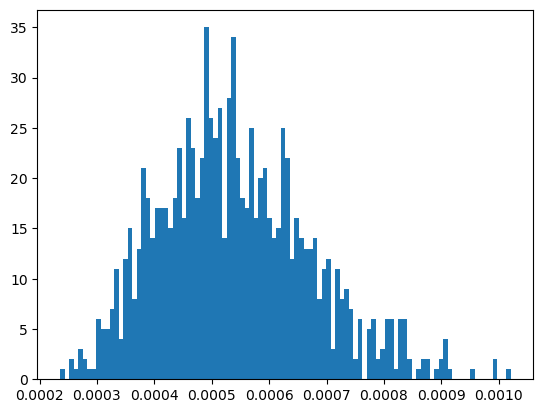

In [77]:
plt.figure()

plt.hist(bs_thetahat, bins=100)

plt.show()

In [81]:
# Bootstrap p-value
bs_pvalues[d0 - 1] = np.sum(bs_thetahat >= thetahatH0) / B
bs_pvalues

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.939])

In [84]:
thetahat_old

array([2.46767464e-02, 1.04657371e-02, 4.40222515e-03, 1.29235969e-03,
       1.07732674e-03, 7.84587644e-04, 3.63822591e-04, 2.08014641e-04,
       1.58423693e-04, 5.46826280e-05, 5.22764171e-05, 5.00161318e-05,
       3.11821313e-05, 1.60769574e-05, 1.04239227e-05, 5.87090071e-06,
       3.52018202e-06, 2.39533704e-06, 1.56811173e-06, 1.34547258e-06,
       6.92889698e-07, 6.21320570e-07, 4.36647324e-07, 3.58687650e-07,
       1.82308801e-07, 7.06997815e-08, 4.16636781e-08, 2.15140148e-08,
       1.20138072e-08, 6.24622204e-09, 3.81701488e-09, 3.17640938e-09,
       8.16065801e-10, 4.44577288e-10, 2.39788054e-10, 2.06439393e-10,
       1.05606414e-10, 9.09987064e-11, 6.83361406e-11, 5.15865849e-11,
       3.98952476e-11, 3.66997390e-11, 3.13080547e-11, 2.42446015e-11,
       2.19664357e-11, 2.04622301e-11, 1.28706784e-11, 1.11517533e-11,
       1.00423895e-11, 8.88582313e-12, 8.10293220e-12, 6.88345156e-12,
       5.52731852e-12, 4.64513795e-12, 4.33887798e-12, 4.11097739e-12,
      

In [86]:
alpha=0.10
d0_candidates = np.where(bs_pvalues < alpha)[0]
d0 = d0_candidates[0] + 1 if len(d0_candidates) > 0 else 1

In [16]:
D = dimension = 10
d0 = dimension

In [19]:
##################################
# 5. Estimation of Yhat and epsilons
##################################

thetahat = np.real(thetahat_old[:d0])
gammahat = np.real(gammahat_old[:, :d0])

psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

psihat = np.zeros((m, d0))
for i in range(d0):
    psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

etahat = inner_product(psihat, Ydev, du)
Yhat = Ybar + np.dot(psihat, etahat)

Yhat_fix = np.copy(Yhat)
Yhat_fix[Yhat_fix < 0] = 0
for t in range(N):
    Yhat_fix[:, t] /= (np.sum(Yhat_fix[:, t]) * du)

epsilonhat = Y - Yhat

C:\Users\user\AppData\Local\Temp\ipykernel_2880\2548602711.py:20: RuntimeWarning: invalid value encountered in divide
  Yhat_fix[:, t] /= (np.sum(Yhat_fix[:, t]) * du)


In [98]:
Y

array([[-3.51005732, -4.11202783, -3.24585238, ..., -2.84393442,
        -2.74084076, -2.97182714],
       [-3.83188144, -4.28098887, -3.59579788, ..., -2.98136418,
        -2.80842106, -3.21945996],
       [-4.05652257, -4.41542047, -3.90071779, ..., -2.98351113,
        -2.8463944 , -3.43127755],
       ...,
       [-3.8754832 , -2.63477868, -4.14168203, ..., -2.88605382,
        -2.55323719, -2.45801793],
       [-3.85549013, -1.57875   , -3.91413484, ..., -1.59748277,
        -2.05287887, -1.30847462],
       [-3.75817918, -2.53869314, -3.57756573, ..., -2.60829955,
        -2.62065777, -2.30794994]], shape=(200, 121))

In [99]:
Yhat

array([[-3.62239877, -4.14421896, -3.31848717, ..., -3.03455329,
        -2.58159868, -3.23360322],
       [-3.73870356, -4.2647699 , -3.62374862, ..., -2.91268049,
        -2.84179568, -3.14277945],
       [-4.0390742 , -4.46095126, -3.74084668, ..., -2.95421726,
        -2.95345517, -3.43315159],
       ...,
       [-3.86441358, -2.69569447, -4.1082895 , ..., -2.95320115,
        -2.47823349, -2.51979003],
       [-3.87227497, -1.62624436, -4.03593183, ..., -1.69665101,
        -1.98352857, -1.42455918],
       [-3.81603424, -2.44817221, -3.39082505, ..., -2.48195859,
        -2.71103766, -2.17636738]], shape=(200, 121))

In [97]:
epsilonhat

array([[ 0.11234145,  0.03219113,  0.07263479, ...,  0.19061887,
        -0.15924208,  0.26177608],
       [-0.09317788, -0.01621897,  0.02795073, ..., -0.06868369,
         0.03337462, -0.0766805 ],
       [-0.01744836,  0.04553078, -0.15987111, ..., -0.02929387,
         0.10706077,  0.00187404],
       ...,
       [-0.01106961,  0.06091579, -0.03339253, ...,  0.06714733,
        -0.0750037 ,  0.0617721 ],
       [ 0.01678484,  0.04749436,  0.12179699, ...,  0.09916824,
        -0.0693503 ,  0.11608456],
       [ 0.05785505, -0.09052093, -0.18674069, ..., -0.12634095,
         0.09037989, -0.13158256]], shape=(200, 121))

In [20]:
# Versão ChatGPT
def super_fun(Y, lag_max, B, alpha, du, p, m, u, select_ncomp, dimension):
    """
    Python translation of the R function 'super_fun'.
    """

    n = N = Y.shape[1]  # columns in Y

    # Mean over time
    Ybar = np.mean(Y, axis=1, keepdims=True)

    # Deviation from mean
    Ydev = Y - Ybar

    ##############################
    # 3. Creating the matrix core
    ##############################

    core = inner_product(Ydev, Ydev, du)
    Kstar_core0 = core[:(n - p), :(n - p)]

    Kstar_core = np.zeros((n - p, n - p, p))
    for k in range(1, p + 1):
        Kstar_core[:, :, k - 1] = core[k:(n - (p - k)), k:(n - (p - k))]

    # Summing matrices
    Kstar_sum = np.sum(Kstar_core, axis=2)

    # Define Kstar
    Kstar = (n - p) ** (-2) * np.dot(Kstar_sum, Kstar_core0)

    ##########################
    # 4. Eigen decomposition #
    ##########################

    eigvals, eigvecs = np.linalg.eig(Kstar)

    # Keep real parts
    tol = 1e-4
    for j in range(min(10, len(eigvals))):
        if abs(np.imag(eigvals[j])) > tol:
            print("Complex eigenvalue found.")

    eigvals = np.real(eigvals)
    eigvecs = np.real(eigvecs)

    # Sort eigenvalues and eigenvectors (descending)
    idx = np.argsort(eigvals)[::-1]
    thetahat = eigvals[idx]
    gammahat = eigvecs[:, idx]

    thetahat_old = thetahat.copy()
    gammahat_old = gammahat.copy()

    #############################
    # Select number of components
    #############################
    if select_ncomp:
        bs_pvalues = np.zeros(lag_max)

        def sampleCols(A):
            idx = np.random.permutation(A.shape[1])
            return A[:, idx]

        for d0 in range(1, lag_max + 1):
            thetahatH0 = np.real(thetahat_old[d0])
            thetahat = np.real(thetahat_old[:d0])
            gammahat = np.real(gammahat_old[:, :d0])

            psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

            psihat = np.zeros((m, d0))
            for i in range(d0):
                psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

            etahat = inner_product(psihat, Ydev, du)
            Yhat = Ybar + np.dot(psihat, etahat)

            epsilonhat = Y - Yhat

            # Bootstrap
            bs_thetahat = np.zeros(B)
            for i in range(B):
                bs_epsilon = sampleCols(epsilonhat)
                # bs_Y = Yhat_fix + bs_epsilon
                bs_Y = Yhat + bs_epsilon
                bs_Ybar = np.mean(bs_Y, axis=1, keepdims=True)
                bs_Ydev = bs_Y - bs_Ybar

                bs_core = inner_product(bs_Ydev, bs_Ydev, du)
                bs_Kstar_core0 = bs_core[:(n - p), :(n - p)]

                bs_Kstar_core = np.zeros((n - p, n - p, p))
                for k in range(1, p + 1):
                    bs_Kstar_core[:, :, k - 1] = bs_core[k:(n - (p - k)), k:(n - (p - k))]

                bs_Kstar_sum = np.sum(bs_Kstar_core, axis=2)
                bs_Kstar = (n - p) ** (-2) * np.dot(bs_Kstar_sum, bs_Kstar_core0)
                bs_eigvals, _ = np.linalg.eig(bs_Kstar)
                bs_eigvals = np.sort(np.real(bs_eigvals))[::-1]
                bs_thetahat[i] = bs_eigvals[d0]

            # Bootstrap p-value
            bs_pvalues[d0 - 1] = np.sum(bs_thetahat >= thetahatH0) / B

        d0_candidates = np.where(bs_pvalues < alpha)[0]
        d0 = d0_candidates[0] + 1 if len(d0_candidates) > 0 else 1

    else:
        d0 = dimension

    ##################################
    # 5. Estimation of Yhat and epsilons
    ##################################

    thetahat = np.real(thetahat_old[:d0])
    gammahat = np.real(gammahat_old[:, :d0])

    psihat_root = np.dot(Ydev[:, :(n - p)], gammahat)

    psihat = np.zeros((m, d0))
    for i in range(d0):
        psihat[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

    etahat = inner_product(psihat, Ydev, du)
    Yhat = Ybar + np.dot(psihat, etahat)

    epsilonhat = Y - Yhat

    result = {
        "Y": Y,
        "Ybar": Ybar,
        "thetahat": thetahat,
        "gammahat": gammahat,
        "psihat": psihat,
        "etahat": etahat,
        "Yhat": Yhat,
        "Yhat_fix": Yhat_fix,
        "epsilonhat": epsilonhat,
        "u": u,
        "d0": d0
    }

    if select_ncomp == "TRUE":
        result["bs_pvalues"] = bs_pvalues

    return result

In [21]:
lag_maximum = 6
alpha_val = 0.10
no_boot = 1000
du=round(lqdensities.index.diff()[1],15)
p=5
m=200
D_val = 10
Y = lqdensities.reset_index(drop=True).T.values

result = super_fun(Y, lag_maximum, no_boot, alpha_val, 
                   du, p, m, lqdensities.index, select_ncomp=False, dimension = D_val)

ValueError: could not broadcast input array from shape (121,) into shape (200,)

In [28]:
psihat_root[:, i] = psihat_root[:, i] / L2norm(psihat_root[:, i], du)

In [25]:
psihat_root[:, i].shape

(200,)